# Foundations for Data Science: FoodHub Data Analysis

> Data Analysis in Python and NumPy

- toc: true 
- badges: true
- comments: true
- author: Rajesh Kanna V
- categories: [python, ML from scratch, tutorial]
- image: images/posts/pca_scratch.png
- cover: images/covers/pca_scratch.png
- permalink: /blog/:year:month:day/data-analysis-foodhub

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understanding the structure of the data

In [9]:
# !ls /content/drive/MyDrive/Courses/MIT-DS/01-FoundationForDS-Project

FDS_Project_LearnerNotebook_FullCode.ipynb  foodhub_order.csv


In [10]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Courses/MIT-DS/01-FoundationForDS-Project/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [14]:
# Write your code here
print(df.shape)
print('Rows: ' , df.shape[0])
print('Columns: ' , df.shape[1])

(1898, 9)
Rows:  1898
Columns:  9


#### Observations:

- Number of Rows: 1898
- Number of Columns: 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [17]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

- order_id: Integer
- customer_id: Integer
- restaurant_name: String
- cuisine_type: String
- cost_of_the_order: Float
- day_of_the_week: String
- rating: String
- food_preparation_time: Integer
- delivery_time: Integer

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [20]:
# Write your code here
# Check for missing values
missing_values_df = df.isnull().sum()
print("Missing values in data:\n", missing_values_df)

# Treat missing values
for column in missing_values_df.index:
    if missing_values_df[column] > 0:
        if df[column].dtype == 'object':
            # For categorical variables, replace missing values with 'Unknown'
            df[column].fillna('Unknown', inplace=True)
        else:
            # For numerical variables, replace missing values with mean
            df[column].fillna(df[column].mean(), inplace=True)

# Confirm that missing values have been treated
missing_values_after_treatment_df = df.isnull().sum()
print("Missing values in data after treatment:\n", missing_values_after_treatment_df)

Missing values in data:
 order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
Missing values in data after treatment:
 order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:

- There are no missing values in the data


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [21]:
# Write your code here

# Get statistical summary
summary = df['food_preparation_time'].describe()

# Extract minimum, average (mean), and maximum values
minimum_time = summary['min']
average_time = summary['mean']
maximum_time = summary['max']

print("Minimum time for food preparation:", minimum_time, "minutes")
print("Average time for food preparation:", average_time, "minutes")
print("Maximum time for food preparation:", maximum_time, "minutes")

Minimum time for food preparation: 20.0 minutes
Average time for food preparation: 27.371970495258168 minutes
Maximum time for food preparation: 35.0 minutes


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [25]:
# Write the code here

# Count the number of orders with rating 'Not given'
not_rated_count = (df['rating'] == 'Not given').sum()

print("Number of orders not rated:", not_rated_count)

Number of orders not rated: 736


#### Observations:

- Number of orders not rated is 736

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [34]:
### Order ID

print('Unique Order ID: ', df['order_id'].nunique())
df['order_id'].sample(5)

Unique Order ID:  1898


732     1477318
76      1477921
574     1478059
1799    1477259
868     1477340
Name: order_id, dtype: int64

In [35]:
### Customer ID

print('Unique Customer ID: ', df['customer_id'].nunique())
df['customer_id'].sample(5)

Unique Customer ID:  1200


616     304509
944      52327
1813    316223
1451     59742
986     334758
Name: customer_id, dtype: int64

Unique Restaurant Name:  178
1326                  Sushi Samba
1363            Blue Ribbon Sushi
1788          Vanessa's Dumplings
232                         S'MAC
1636    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object


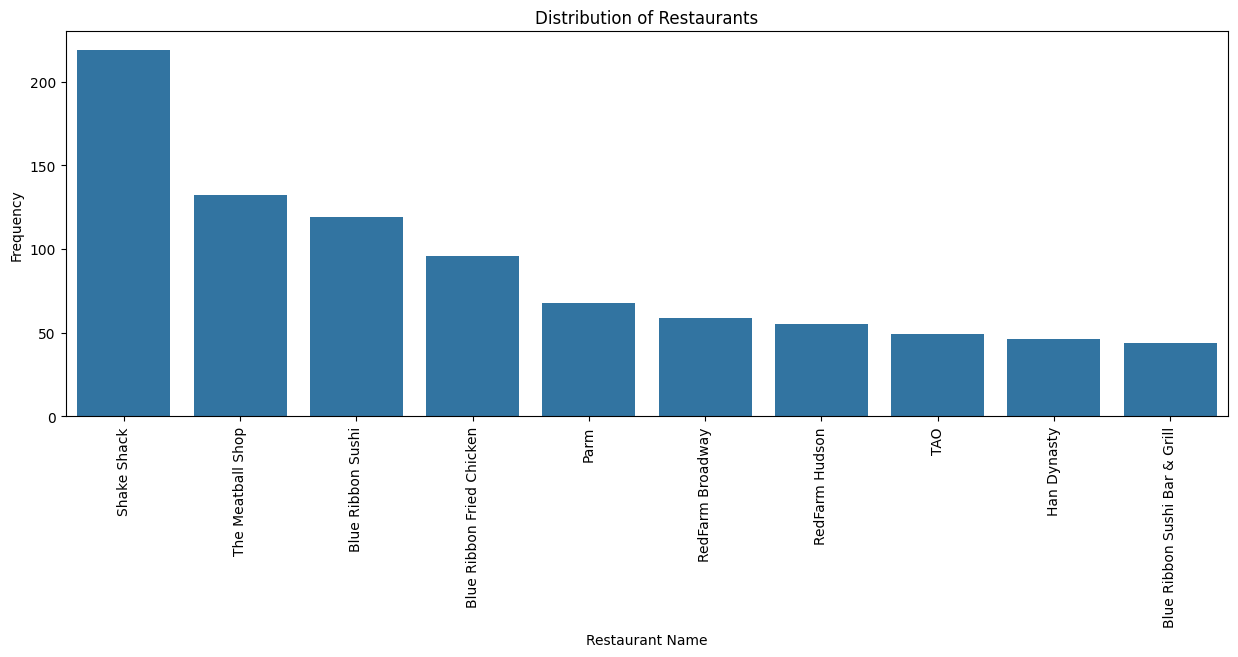

In [73]:
### Restaurant Name

print('Unique Restaurant Name: ', df['restaurant_name'].nunique())
print(df['restaurant_name'].sample(5))

# Get the top 10 restaurant names
top_10_restaurants_df = df['restaurant_name'].value_counts().nlargest(10)

plt.figure(figsize = (15,5))
sns.countplot(data=df, x='restaurant_name', order=top_10_restaurants_df.index)
plt.title('Distribution of Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Unique Cuisine Type:  14
900     American
993      Italian
1184    Japanese
789     Japanese
1822    Japanese
Name: cuisine_type, dtype: object


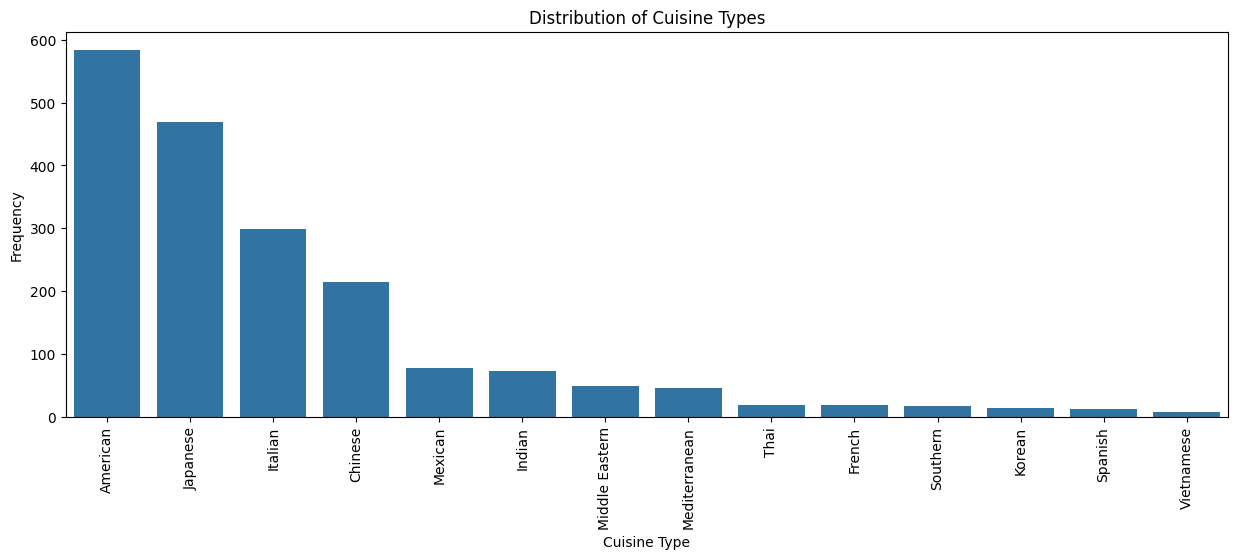

In [72]:
### Cuisine Type

print('Unique Cuisine Type: ', df['cuisine_type'].nunique())
print(df['cuisine_type'].sample(5))

# Get the cuisine type names
cuisine_type_df = df['cuisine_type'].value_counts()

plt.figure(figsize = (15,5))
sns.countplot(data=df, x='cuisine_type', order=cuisine_type_df.index)
plt.title('Distribution of Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

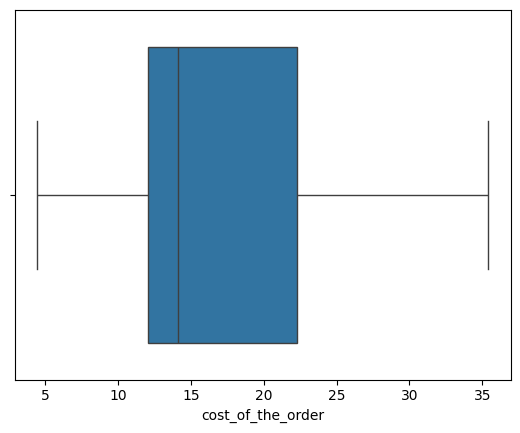

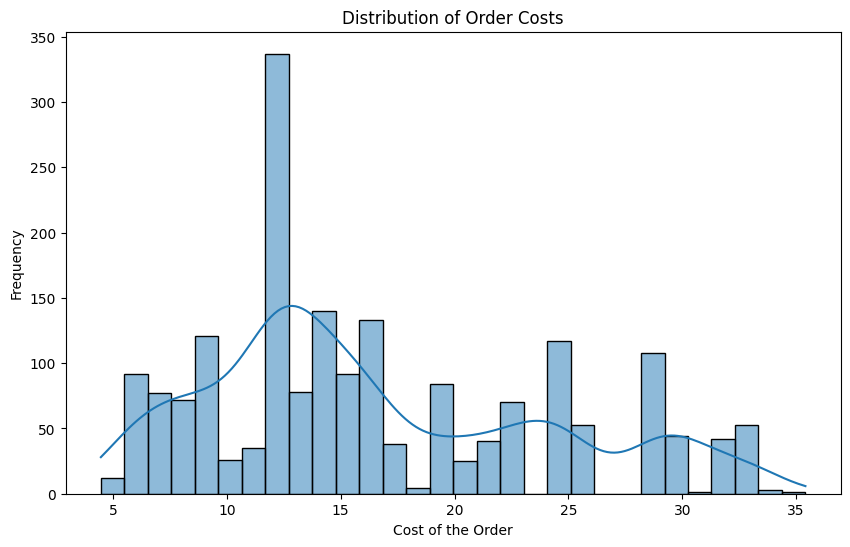

In [69]:
### Cost of the order

sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='cost_of_the_order', bins=30, kde=True)
plt.title('Distribution of Order Costs')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()

Unique Day of the week:  2
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


<Axes: xlabel='day_of_the_week', ylabel='count'>

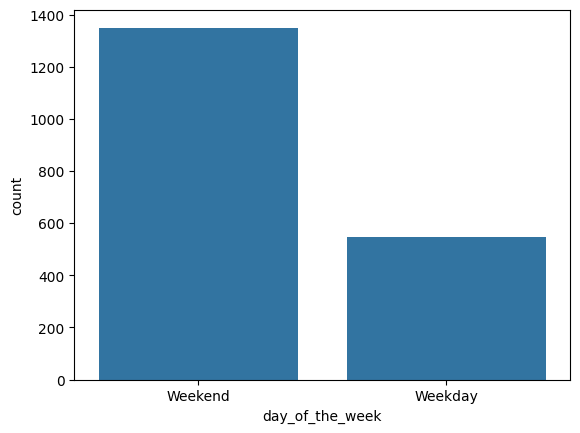

In [68]:
### Day of the week

print('Unique Day of the week: ', df['day_of_the_week'].nunique())

print(df['day_of_the_week'].value_counts())

sns.countplot(data=df, x='day_of_the_week')


Unique Rating:  4
rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


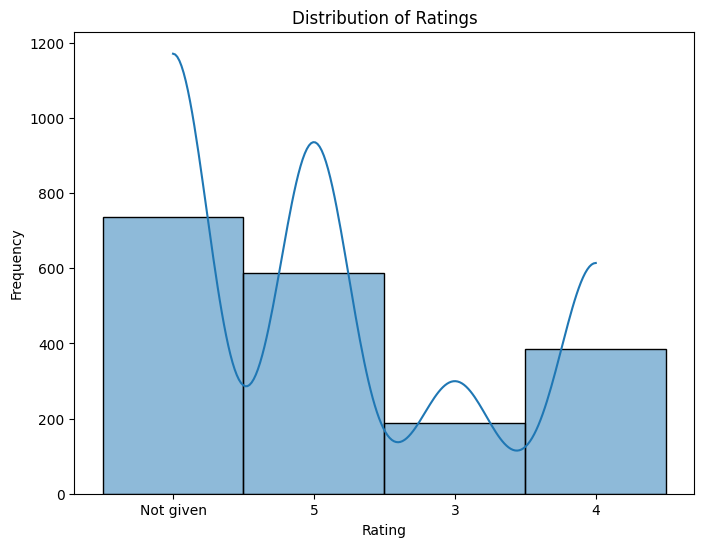

In [66]:
### Rating

print('Unique Rating: ', df['rating'].nunique())

print(df['rating'].value_counts())

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='rating', bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

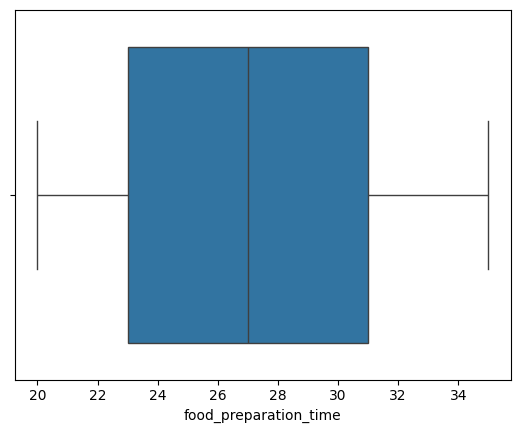

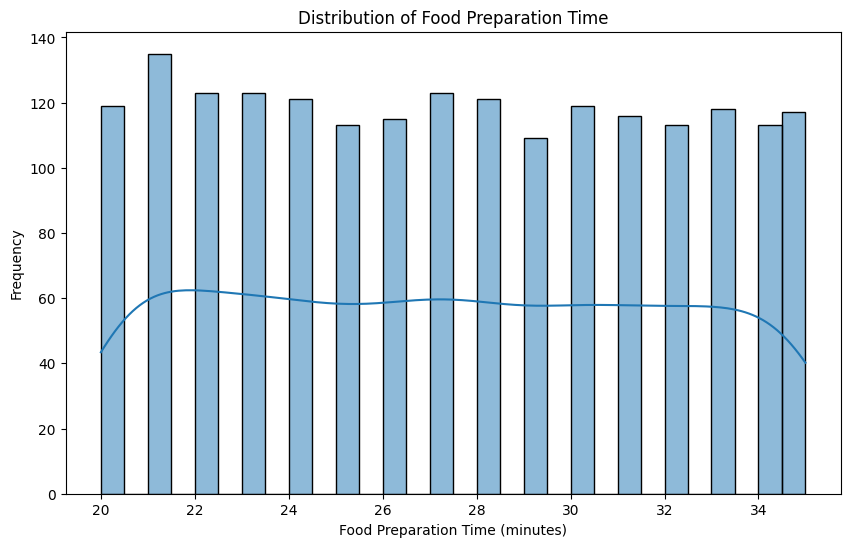

In [65]:
### Food Preparation Time

sns.boxplot(data=df,x='food_preparation_time')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='food_preparation_time', bins=30, kde=True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()

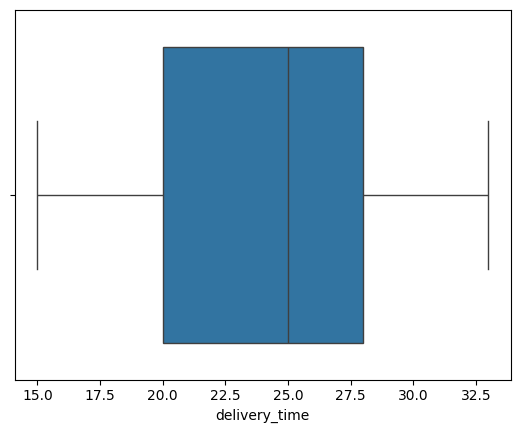

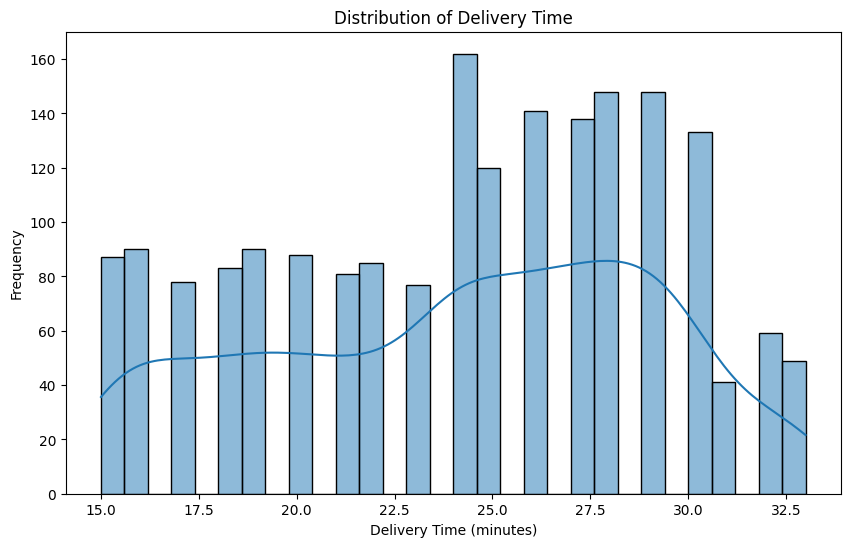

In [64]:
### Delivery Time
sns.boxplot(data=df,x='delivery_time')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='delivery_time', bins=30, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [74]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

The top 5 restaurants are:
- Shake Shack: 219
- The Meatball Shop: 132
- Blue Ribbon Sushi: 119
- Blue Ribbon Fried Chicken: 96
- Parm: 68


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [78]:
# Write the code here
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:
- Most popular cuisine on weekends: American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [79]:
# Write the code here

# Filter orders with cost greater than $20
expensive_orders = df[df['cost_of_the_order'] > 20]

# Calculate the percentage of expensive orders
percentage_expensive_orders = (len(expensive_orders) / len(df)) * 100

print("Percentage of orders costing more than $20:", percentage_expensive_orders)

Percentage of orders costing more than $20: 29.24130663856691


#### Observations:

- Percentage of orders costing more than $20: 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [80]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
- Mean order delivery time: 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [81]:
# Write the code here
df['customer_id'].value_counts().head(3)

Top 3 most frequent customers:
Customer ID: 52832 | Number of Orders: 13
Customer ID: 47440 | Number of Orders: 10
Customer ID: 83287 | Number of Orders: 9


#### Observations:

- Customer with ID: 52832 has placed the highest number of orders, totaling 13. This indicates that they are a loyal and frequent user of the food delivery service provided by the company.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [86]:
# order_id: Integer
# customer_id: Integer
# restaurant_name: String
# cuisine_type: String
# cost_of_the_order: Float
# day_of_the_week: String
# rating: String
# food_preparation_time: Integer
# delivery_time: Integer

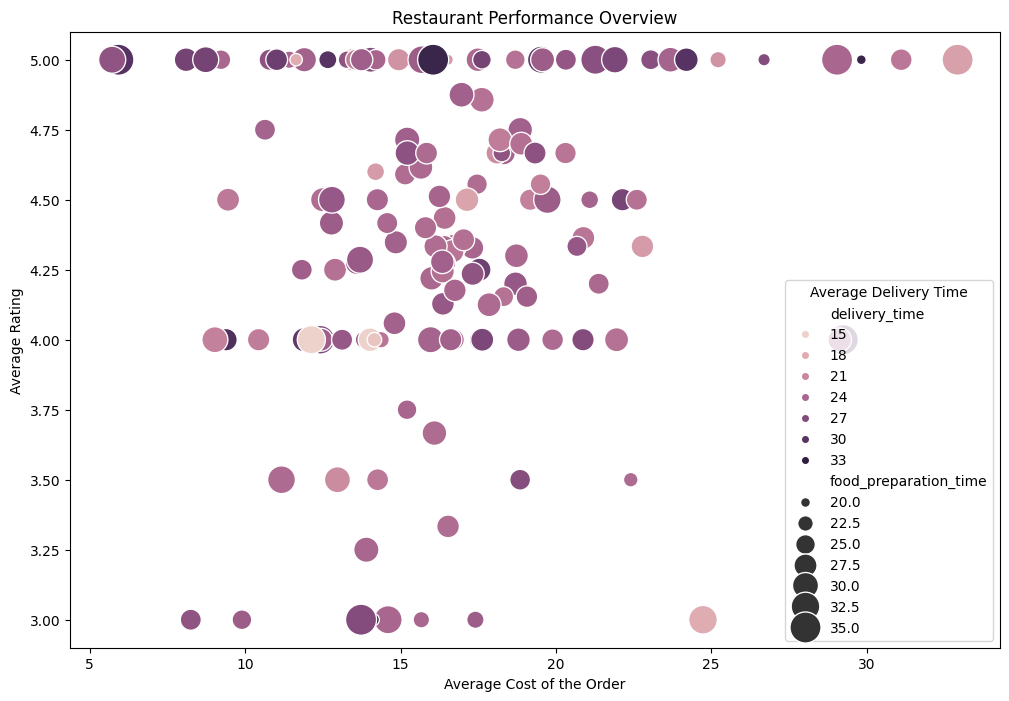

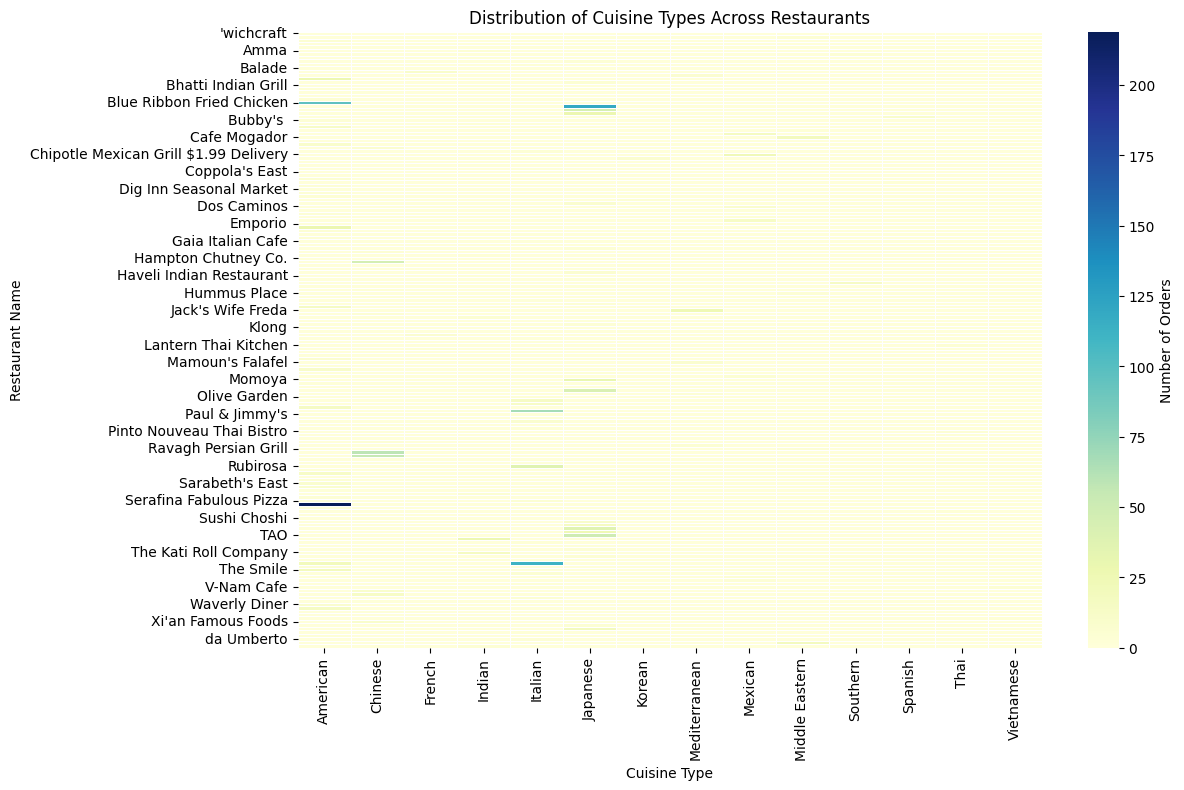

In [103]:
### Restaurant_name vs Cost of the order and Cuisine type

# Convert 'Not given' to NaN
df['rating_float'] = df['rating'].replace('Not given', np.nan).astype(float)

# Scenario 1: Aggregate statistics for each restaurant
restaurant_stats = df.groupby('restaurant_name').agg({
    'cost_of_the_order': 'mean',
    'rating_float': 'mean',
    'food_preparation_time': 'mean',
    'delivery_time': 'mean'
}).reset_index()

# Visualize aggregated statistics
plt.figure(figsize=(12, 8))
sns.scatterplot(data=restaurant_stats, x='cost_of_the_order', y='rating_float', size='food_preparation_time', hue='delivery_time', sizes=(50, 500))
plt.title('Restaurant Performance Overview')
plt.xlabel('Average Cost of the Order')
plt.ylabel('Average Rating')
plt.legend(title='Average Delivery Time')
plt.show()

# Scenario 2: Distribution of cuisine types across restaurants
cuisine_counts = df.groupby(['restaurant_name', 'cuisine_type']).size().unstack(fill_value=0)

# Plot distribution of cuisine types across restaurants
plt.figure(figsize=(12, 8))
sns.heatmap(cuisine_counts, cmap='YlGnBu', cbar_kws={'label': 'Number of Orders'}, linewidths=0.5)
plt.title('Distribution of Cuisine Types Across Restaurants')
plt.xlabel('Cuisine Type')
plt.ylabel('Restaurant Name')
plt.show()

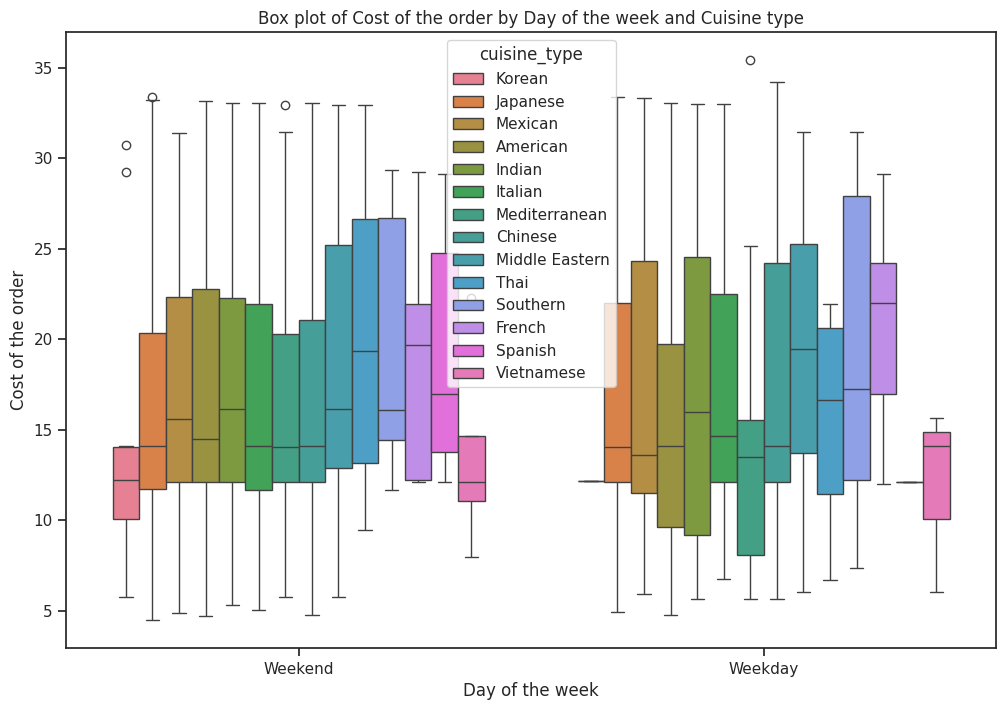

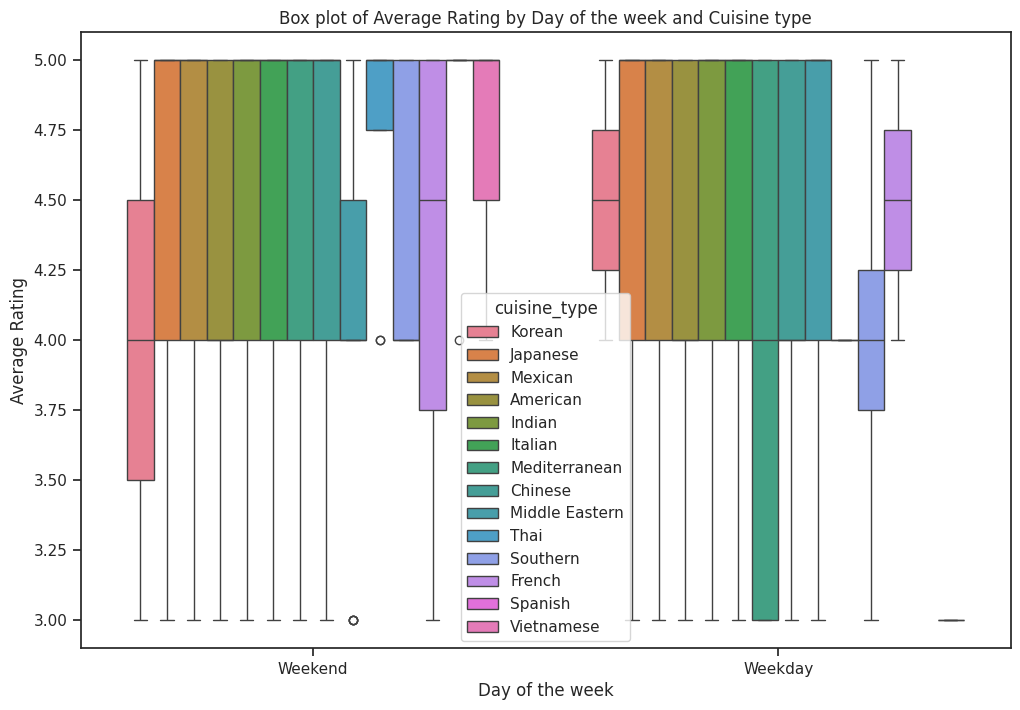

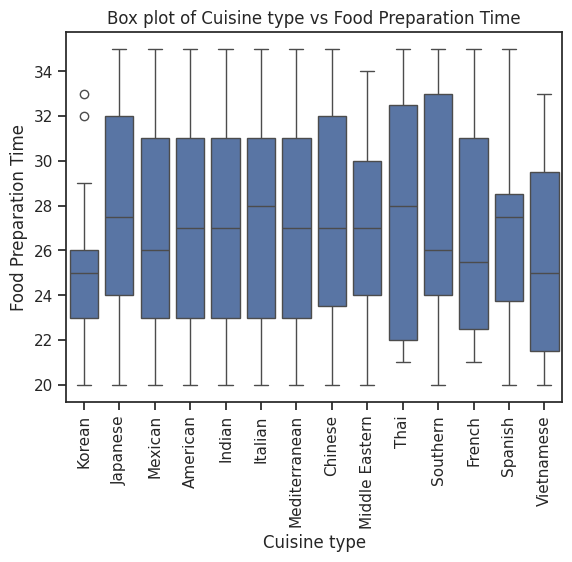

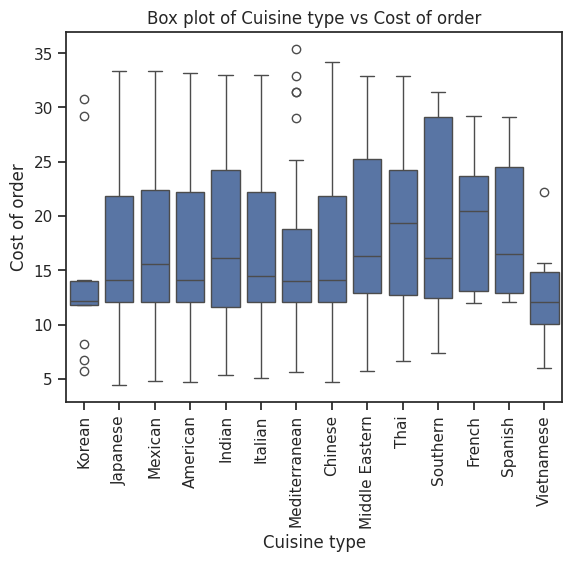

In [127]:
# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order', hue='cuisine_type')
plt.title('Box plot of Cost of the order by Day of the week and Cuisine type')
plt.xlabel('Day of the week')
plt.ylabel('Cost of the order')
plt.show()

# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='day_of_the_week', y='rating_float', hue='cuisine_type')
plt.title('Box plot of Average Rating by Day of the week and Cuisine type')
plt.xlabel('Day of the week')
plt.ylabel('Average Rating')
plt.show()

sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xticks(rotation = 90)
plt.title('Box plot of Cuisine type vs Food Preparation Time')
plt.xlabel('Cuisine type')
plt.ylabel('Food Preparation Time')
plt.show()

sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 90)
plt.title('Box plot of Cuisine type vs Cost of order')
plt.xlabel('Cuisine type')
plt.ylabel('Cost of order')
plt.show()

<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

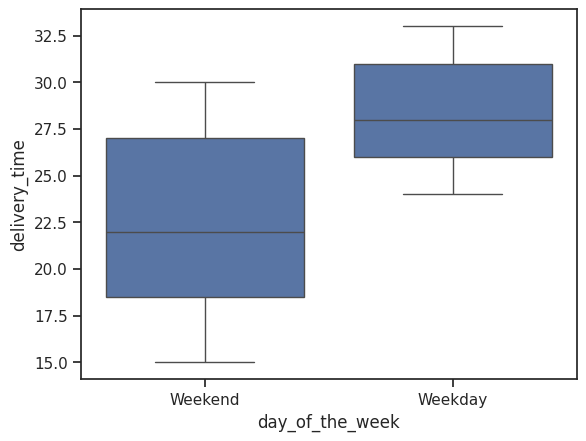

In [126]:
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)

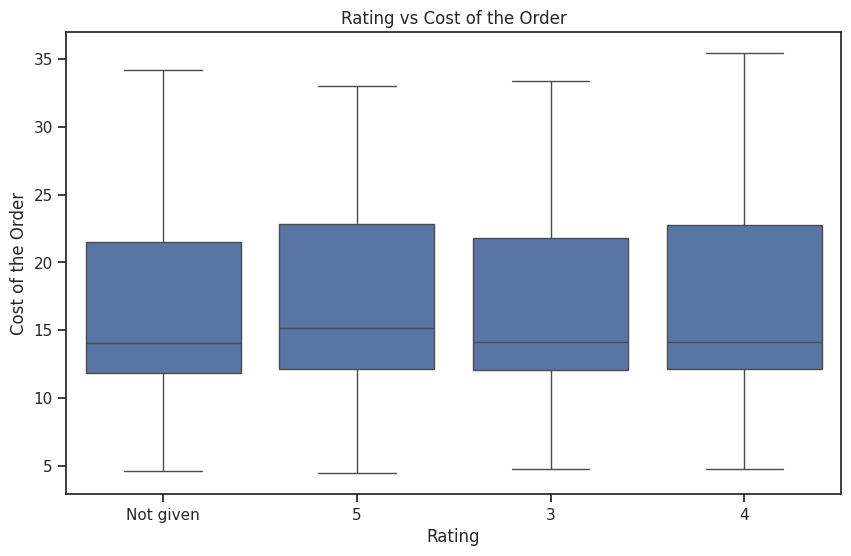

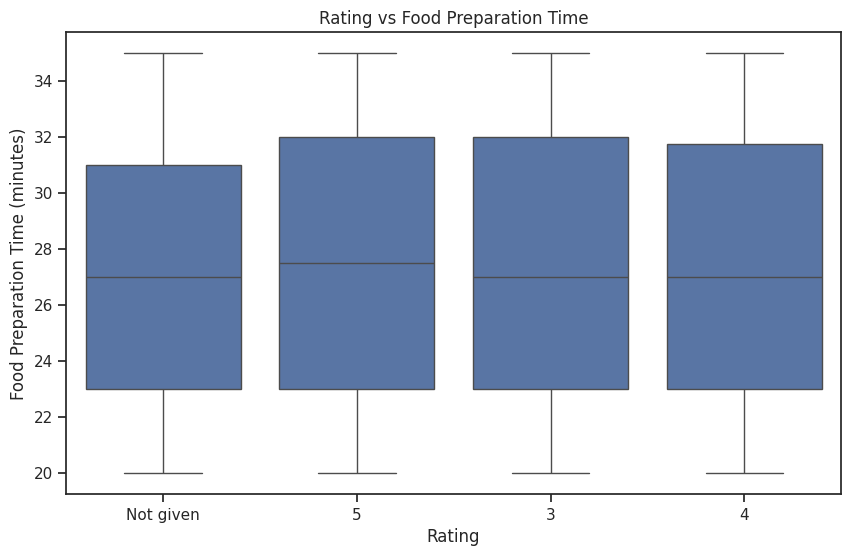

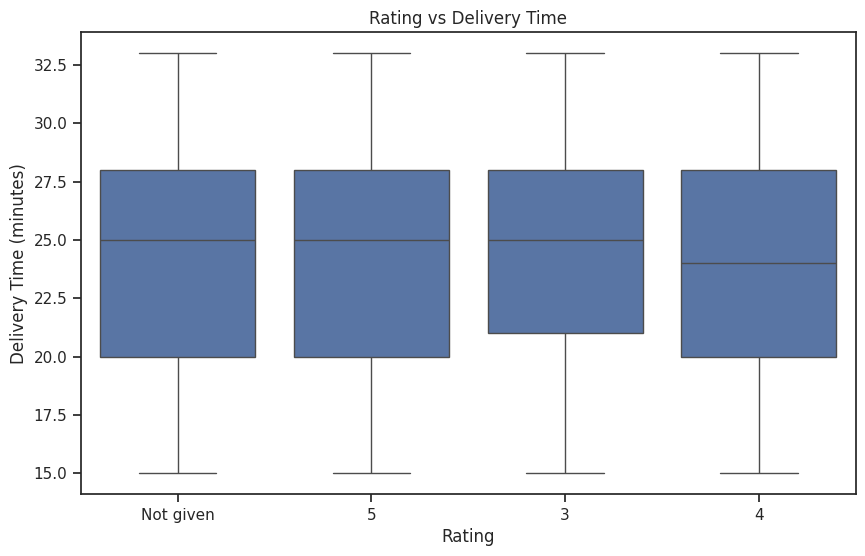

In [129]:
# Box plot: Rating vs Cost of the Order
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rating', y='cost_of_the_order')
plt.title('Rating vs Cost of the Order')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.show()

# Box plot: Rating vs Food Preparation Time
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rating', y='food_preparation_time')
plt.title('Rating vs Food Preparation Time')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time (minutes)')
plt.show()

# Box plot: Rating vs Delivery Time
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rating', y='delivery_time')
plt.title('Rating vs Delivery Time')
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')
plt.show()

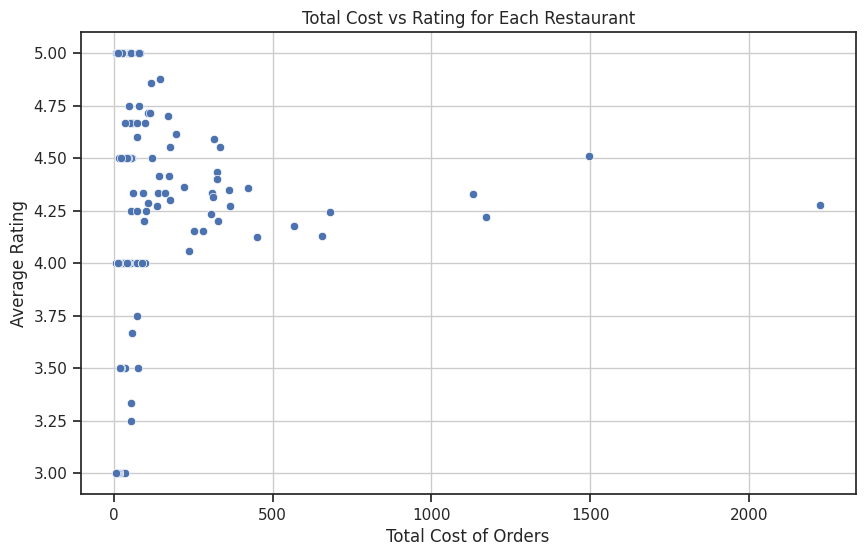

In [162]:
# Filter out rows with 'Not given' rating
filtered_df = df[df['rating'] != 'Not given'].copy()

# Convert rating to numeric for easier analysis
filtered_df['rating'] = filtered_df['rating'].astype(float)

# Group by restaurant_name and calculate total cost_of_the_order and average rating
restaurant_stats = filtered_df.groupby('restaurant_name').agg({
    'cost_of_the_order': 'sum',
    'rating': 'mean'
}).reset_index()

# Plotting the relationship between total cost_of_the_order and average rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=restaurant_stats, x='cost_of_the_order', y='rating')
plt.title('Total Cost vs Rating for Each Restaurant')
plt.xlabel('Total Cost of Orders')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

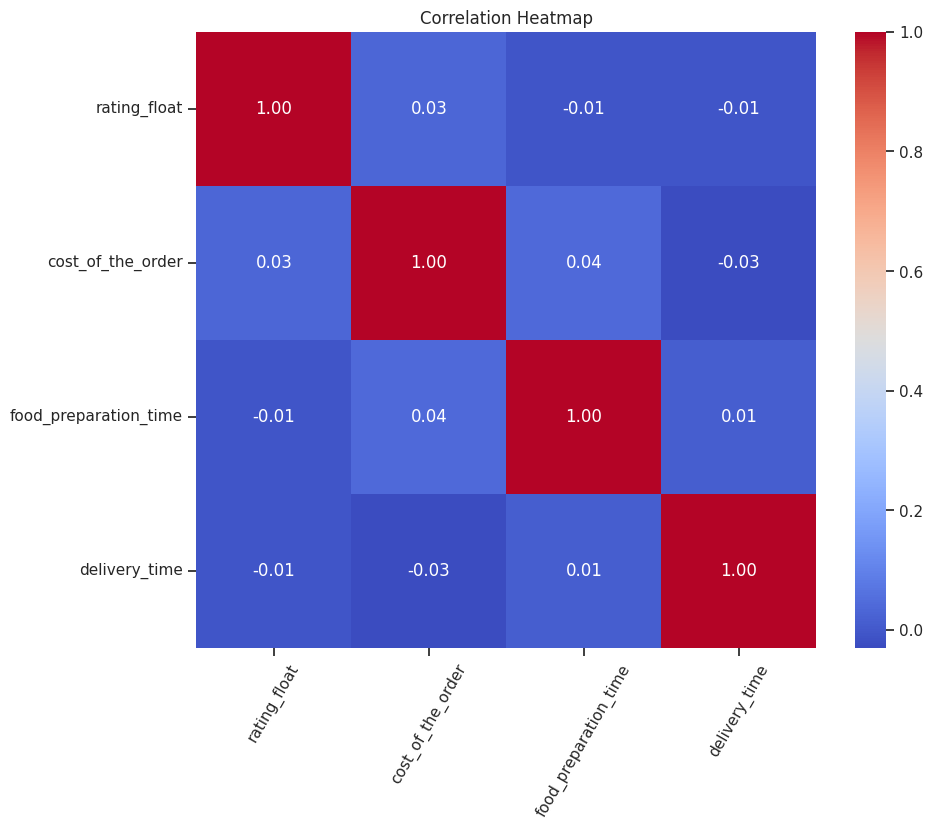

In [133]:
# Create a subset of the dataframe with relevant columns
subset_df = df[['rating_float', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']]

# Calculate correlation matrix
corr_matrix = subset_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation = 60)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [154]:
# Write the code here
# Replace 'Not given' ratings with NaN
# Filter the rated restaurants
df_rating = df[df['rating'] != 'Not given'].copy()

# Convert rating column to numeric
df_rating['rating'] = df_rating['rating'].astype('int')

# Filter restaurants with rating count > 50
restaurant_rating_count = df_rating.groupby('restaurant_name')['rating'].count().sort_values(ascending = False)
print(restaurant_rating_count.head())

eligible_restaurants = restaurant_rating_count[restaurant_rating_count > 50].index.tolist()

eligible_restaurants

restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
Name: rating, dtype: int64


['Shake Shack',
 'The Meatball Shop',
 'Blue Ribbon Sushi',
 'Blue Ribbon Fried Chicken']

In [157]:
# Calculate average rating for each restaurant
restaurant_avg_rating = df_rating.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False)
print(restaurant_avg_rating.head())

# Filter restaurants with average rating > 4
eligible_restaurants = [restaurant for restaurant in eligible_restaurants if restaurant_avg_rating[restaurant] > 4]

# Print eligible restaurants
print("Restaurants fulfilling the promotional offer criteria:")

for restaurant in eligible_restaurants:
    print(restaurant, restaurant_avg_rating[restaurant])


restaurant_name
'wichcraft                       5.0
Ravagh Persian Grill             5.0
Chola Eclectic Indian Cuisine    5.0
Chote Nawab                      5.0
Junoon                           5.0
Name: rating, dtype: float64
Restaurants fulfilling the promotional offer criteria:
Blue Ribbon Fried Chicken 4.328125
Blue Ribbon Sushi 4.219178082191781
Shake Shack 4.2781954887218046
The Meatball Shop 4.511904761904762


#### Observations:

Restaurants fulfilling the promotional offer criteria with ratings:
- The Meatball Shop 4.51
- Blue Ribbon Fried Chicken 4.32
- Shake Shack 4.27
- Blue Ribbon Sushi 4.21

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [158]:
# Write the code here

# Define the function to calculate revenue for each order
def calculate_revenue(cost):
    if cost > 20:
        return 0.25 * cost
    elif cost > 5:
        return 0.15 * cost
    else:
        return 0

# Calculate revenue for each order and sum up
total_revenue = df['cost_of_the_order'].apply(calculate_revenue).sum()

print("Net revenue generated by the company across all orders: $", total_revenue)

Net revenue generated by the company across all orders: $ 6166.303


#### Observations:

Net revenue generated by the company across all orders is $ 6166.303

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [159]:
# Write the code here
# Calculate total time for each order (food preparation time + delivery time)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders taking more than 60 minutes
orders_over_60_minutes = (df['total_time'] > 60).sum()
total_orders = len(df)
percentage_over_60_minutes = (orders_over_60_minutes / total_orders) * 100

print(f"Percentage of orders taking more than 60 minutes: {percentage_over_60_minutes:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:

- Percentage of orders taking more than 60 minutes is 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [161]:
# Write the code here

# Group the data by 'day_of_the_week' and calculate the mean delivery time
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

# Print the mean delivery time for weekdays and weekends
print("Mean delivery time on weekdays and weekends:")
print(mean_delivery_time_by_day)

Mean delivery time on weekdays and weekends:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:

- Mean delivery time on weekdays is 28.34 minutes
- Mean delivery time on Weekends is 22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

- Average Rating has high corelation with the Cost of the Order
- Average Cost of the Order has high corelation with the Food Preparation Time
- Average Rating vs Total cost of order per restaurant shows most people rated around an average of 4.25

### Recommendations:

- Business can look at methods to improve Food Preparation Time, as it has high corelation with Cost of the Order and inturn with the Rating.
- Business can look to balance Cost to target customers for improving the Rating.

---